# Energy Prediction

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score


## Read Data and Correct errors

In [11]:
df = pd.read_csv("../datsets/dataset1/archive/HomeC.csv", delimiter = ',')
 

#Dropped last line (null)
df = df.iloc[:-1] #drop last row


#Time is wrong, data was recorded minutely
time_index = pd.date_range('2016-01-01 05:00', periods=len(df),  freq='min')  
time_index = pd.DatetimeIndex(time_index)
df = df.set_index(time_index)
df = df.drop(['time'], axis=1)

#Retirar [kW]
df.columns = [col.replace(' [kW]', '') for col in df.columns]


#Somar colunas 
df['Furnace'] = df[['Furnace 1','Furnace 2']].sum(axis=1)
df['Kitchen'] = df[['Kitchen 12','Kitchen 14','Kitchen 38']].sum(axis=1)
df = df.drop(['Kitchen 12','Kitchen 14','Kitchen 38'], axis=1)
df = df.drop(['Furnace 1','Furnace 2'], axis=1)

#this column is the same as use
df = df.drop(columns=['House overall'])

#useless
df = df.drop(columns=['summary'])
df = df.drop(columns=['icon'])

#SAVE
#df.to_csv('../datsets/dataset1/archive/HomeC.csv', index=False)


df



/home/joaonps/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (0,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,use,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
2016-01-01 05:00:00,0.932833,0.003483,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.082617,0.000567
2016-01-01 05:01:00,0.934333,0.003467,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.084533,0.000567
2016-01-01 05:02:00,0.931817,0.003467,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.083017,0.000617
2016-01-01 05:03:00,1.022050,0.003483,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.175417,0.000650
2016-01-01 05:04:00,1.139400,0.003467,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,29.26,1016.91,9.18,cloudCover,282.0,0.0000,24.40,0.00,0.300917,0.000783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-16 03:25:00,1.601233,0.003183,0.000050,0.041783,0.005267,0.008667,0.013483,0.032283,0.000983,0.003800,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.727683,0.000633
2016-12-16 03:26:00,1.599333,0.003233,0.000050,0.041750,0.005233,0.008433,0.013433,0.032200,0.000950,0.003800,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,0.729050,0.000600
2016-12-16 03:27:00,1.924267,0.003217,0.000033,0.042033,0.004983,0.008467,0.012933,0.032283,0.001000,0.003750,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.060117,0.000600
2016-12-16 03:28:00,1.978200,0.003217,0.000050,0.042100,0.005333,0.008233,0.012817,0.032183,0.000950,0.003767,...,29.45,1011.49,6.72,0.31,186.0,0.0101,31.27,0.51,1.116033,0.000650


In [12]:
#CORRECT cloudCover COLUMN

print(df['cloudCover'].unique())

#replace missing values with the next valid observation 
df['cloudCover'].replace(['cloudCover'], method='bfill', inplace=True) 

#change to floar
df['cloudCover'] = df['cloudCover'].astype('float')

df['cloudCover'].unique()

['cloudCover' '0.75' '0' '1' '0.31' '0.44' '0.13' '0.19' '0.25' '0.16'
 '0.21' '0.15' '0.14' '0.27' '0.28' '0.17' '0.05' '0.1' '0.26' '0.29'
 '0.11' '0.09' '0.12' '0.06' '0.02' '0.08' '0.04' '0.35' '0.22' '0.23'
 '0.54' '0.39' '0.03' '0.07' '0.76' '0.62' '0.18' '0.79' '0.48' '0.24'
 '0.57' 0.24 1.0 0.31 0.28 0.15 0.41 0.1 0.12 0.08 0.09 0.19 0.04 0.05
 0.29 0.27 0.35 0.18 0.06 0.03 0.11 0.14 0.25 0.78 0.0 0.16 0.21 0.23 0.17
 0.75 0.26 0.2 0.76 0.13 0.77 0.46 0.07 0.55 0.02 0.01 0.51 0.47 0.5 0.4
 0.3 0.22 0.43 0.33 0.6 0.68 0.66 0.45 0.34 0.52 0.67 0.48 0.49 0.39 0.37
 0.62 0.36 0.79 0.61 0.38 0.42 0.53 0.63 0.44 0.54 0.32 0.56 0.58 0.72
 0.57 0.73 0.71 0.64 0.59]


array([0.75, 0.  , 1.  , 0.31, 0.44, 0.13, 0.19, 0.25, 0.16, 0.21, 0.15,
       0.14, 0.27, 0.28, 0.17, 0.05, 0.1 , 0.26, 0.29, 0.11, 0.09, 0.12,
       0.06, 0.02, 0.08, 0.04, 0.35, 0.22, 0.23, 0.54, 0.39, 0.03, 0.07,
       0.76, 0.62, 0.18, 0.79, 0.48, 0.24, 0.57, 0.41, 0.78, 0.2 , 0.77,
       0.46, 0.55, 0.01, 0.51, 0.47, 0.5 , 0.4 , 0.3 , 0.43, 0.33, 0.6 ,
       0.68, 0.66, 0.45, 0.34, 0.52, 0.67, 0.49, 0.37, 0.36, 0.61, 0.38,
       0.42, 0.53, 0.63, 0.32, 0.56, 0.58, 0.72, 0.73, 0.71, 0.64, 0.59])

## Data Treatment

In [13]:
#GROUP DATA PER HOUR INTERVAL

#data  is in KwH, basta fazer a media
df = df.resample('H').mean()

#DROP LAST LINE (INCOMPLETE HOUR)
df.drop(df.tail(1).index,inplace=True)

df

,use,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen
2016-01-01 05:00:00,1.044130,0.003307,0.000064,0.241814,0.037861,0.063351,0.013046,0.038881,0.001042,0.021652,...,29.264667,1016.888000,9.150333,0.750000,282.100000,0.000000,24.383333,0.000,0.393188,0.000821
2016-01-01 06:00:00,0.918167,0.003422,0.000099,0.043294,0.075522,0.112942,0.012836,0.039181,0.001021,0.004216,...,29.364667,1016.232000,8.284000,0.750000,284.733333,0.000000,23.866000,0.000,0.456708,0.000749
2016-01-01 07:00:00,0.714736,0.003448,0.000043,0.043416,0.059486,0.007184,0.013299,0.034439,0.001014,0.004246,...,29.034000,1015.989000,7.927000,0.750000,279.400000,0.000000,23.469000,0.000,0.372170,0.000726
2016-01-01 08:00:00,0.960013,0.003447,0.000138,0.065014,0.060412,0.007045,0.012925,0.034195,0.001016,0.004274,...,30.395333,1016.042000,5.684667,0.750000,265.000000,0.000000,24.202667,0.000,0.616370,0.000806
2016-01-01 09:00:00,0.639836,0.003439,0.000060,0.043392,0.035106,0.007143,0.013220,0.031830,0.001014,0.004258,...,29.673333,1015.815000,6.975000,0.625000,265.500000,0.000000,24.423333,0.000,0.343842,0.000796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 22:00:00,1.210261,0.004140,0.000071,0.041784,0.033194,0.008212,0.012851,0.031983,0.040707,0.003049,...,29.789833,1006.190000,12.677667,0.216667,256.716667,0.000000,20.654667,0.000,0.830258,0.000735
2016-12-15 23:00:00,1.096999,0.004137,0.000075,0.041853,0.044236,0.008119,0.012814,0.032249,0.000992,0.003084,...,29.392667,1012.775333,11.183333,0.816000,189.666667,0.000373,28.414667,0.008,0.772467,0.000732
2016-12-16 00:00:00,1.276585,0.004109,0.000059,0.041711,0.050492,0.105546,0.012526,0.030902,0.040522,0.003001,...,29.813667,1012.628500,11.969500,0.310000,197.633333,0.004313,29.379167,0.182,0.796006,0.000639
2016-12-16 01:00:00,1.260231,0.004141,0.000100,0.041921,0.049140,0.123134,0.012743,0.031992,0.000999,0.003104,...,28.988000,1012.129667,10.720667,0.310000,197.900000,0.010600,30.864333,0.510,0.823418,0.000766


In [14]:

df['month'] = df.index.month
df['weekday'] = df.index.day
df['hour'] = df.index.hour
#df=pd.get_dummies(df)


#Intruduce consumpt in the last 5 hours
"""for step in range(1,6):
    col_name = "use" + str(step) + "ago"
    df[col_name] = df["use"].shift(step, axis = 0)
    
df = df.iloc[5:]   #drop 5 first rows since there is no data relating last 5 hours
"""
df

,use,gen,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability,Furnace,Kitchen,month,weekday,hour
2016-01-01 05:00:00,1.044130,0.003307,0.000064,0.241814,0.037861,0.063351,0.013046,0.038881,0.001042,0.021652,...,0.750000,282.100000,0.000000,24.383333,0.000,0.393188,0.000821,1,1,5
2016-01-01 06:00:00,0.918167,0.003422,0.000099,0.043294,0.075522,0.112942,0.012836,0.039181,0.001021,0.004216,...,0.750000,284.733333,0.000000,23.866000,0.000,0.456708,0.000749,1,1,6
2016-01-01 07:00:00,0.714736,0.003448,0.000043,0.043416,0.059486,0.007184,0.013299,0.034439,0.001014,0.004246,...,0.750000,279.400000,0.000000,23.469000,0.000,0.372170,0.000726,1,1,7
2016-01-01 08:00:00,0.960013,0.003447,0.000138,0.065014,0.060412,0.007045,0.012925,0.034195,0.001016,0.004274,...,0.750000,265.000000,0.000000,24.202667,0.000,0.616370,0.000806,1,1,8
2016-01-01 09:00:00,0.639836,0.003439,0.000060,0.043392,0.035106,0.007143,0.013220,0.031830,0.001014,0.004258,...,0.625000,265.500000,0.000000,24.423333,0.000,0.343842,0.000796,1,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-15 22:00:00,1.210261,0.004140,0.000071,0.041784,0.033194,0.008212,0.012851,0.031983,0.040707,0.003049,...,0.216667,256.716667,0.000000,20.654667,0.000,0.830258,0.000735,12,15,22
2016-12-15 23:00:00,1.096999,0.004137,0.000075,0.041853,0.044236,0.008119,0.012814,0.032249,0.000992,0.003084,...,0.816000,189.666667,0.000373,28.414667,0.008,0.772467,0.000732,12,15,23
2016-12-16 00:00:00,1.276585,0.004109,0.000059,0.041711,0.050492,0.105546,0.012526,0.030902,0.040522,0.003001,...,0.310000,197.633333,0.004313,29.379167,0.182,0.796006,0.000639,12,16,0
2016-12-16 01:00:00,1.260231,0.004141,0.000100,0.041921,0.049140,0.123134,0.012743,0.031992,0.000999,0.003104,...,0.310000,197.900000,0.010600,30.864333,0.510,0.823418,0.000766,12,16,1


In [15]:
#SELECT COLUMNS
use = df["use"]

xnames = list(df.columns)
xnames.remove('gen')             #generation
xnames.remove('Solar')           #solar generation

features = df[xnames]


'''
scores = r_regression(features, use)
scores = sorted([(features.columns[i], scores[i]) for i in range(len(scores))], key=lambda x: x[1], reverse=True)
scores
'''

'\nscores = r_regression(features, use)\nscores = sorted([(features.columns[i], scores[i]) for i in range(len(scores))], key=lambda x: x[1], reverse=True)\nscores\n'

In [16]:
features_train, features_test, use_train, use_test = train_test_split(features.values,use.values.reshape(-1, 1), test_size=300, shuffle=False)
print("X Train: ", features_train.shape)
print("X Test: ", features_test.shape)
print("Y Train: ", use_train.shape)
print("Y Test: ", use_test.shape)

X Train:  (8098, 26)
X Test:  (300, 26)
Y Train:  (8098, 1)
Y Test:  (300, 1)


## LSTM Uni Variate

In [88]:
st_y = MinMaxScaler()


use_train_scalled = st_y.fit_transform(use_train)
use_test_scalled = st_y.transform(use_test)



In [89]:
from keras.preprocessing.sequence import TimeseriesGenerator

seq_size = 10
num_features=1
train_generator = TimeseriesGenerator(use_train_scalled, use_train_scalled, length=seq_size, batch_size=1)

print("Total number of samples in the original training data = ", len(use_train_scalled))
print("Total number of samples in the generated data = ", len(train_generator))

test_generator = TimeseriesGenerator(use_test_scalled, use_test_scalled, length=seq_size ,batch_size=1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(seq_size, num_features)))
model.add(LSTM(units=30))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()



Total number of samples in the original training data =  8093
Total number of samples in the generated data =  8083
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 10, 30)            3840      
                                                                 
 lstm_17 (LSTM)              (None, 30)                7320      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11,191
Trainable params: 11,191
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.fit_generator(generator=train_generator, epochs=32)



<ipython-input-90-fb710258527f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator, epochs=32)


Epoch 1/32
8083/8083 [==============================] - 47s 6ms/step - loss: 0.0035
Epoch 2/32
8083/8083 [==============================] - 45s 6ms/step - loss: 0.0031
Epoch 3/32
8083/8083 [==============================] - 46s 6ms/step - loss: 0.0031
Epoch 4/32
8083/8083 [==============================] - 44s 5ms/step - loss: 0.0031
Epoch 5/32
8083/8083 [==============================] - 44s 5ms/step - loss: 0.0030
Epoch 6/32
8083/8083 [==============================] - 44s 5ms/step - loss: 0.0030
Epoch 7/32
8083/8083 [==============================] - 44s 5ms/step - loss: 0.0030
Epoch 8/32
8083/8083 [==============================] - 44s 5ms/step - loss: 0.0030
Epoch 9/32
8083/8083 [==============================] - 44s 5ms/step - loss: 0.0030
Epoch 10/32
8083/8083 [==============================] - 44s 5ms/step - loss: 0.0030
Epoch 11/32
8083/8083 [==============================] - 44s 5ms/step - loss: 0.0029
Epoch 12/32
8083/8083 [==============================] - 43s 5ms/step - lo

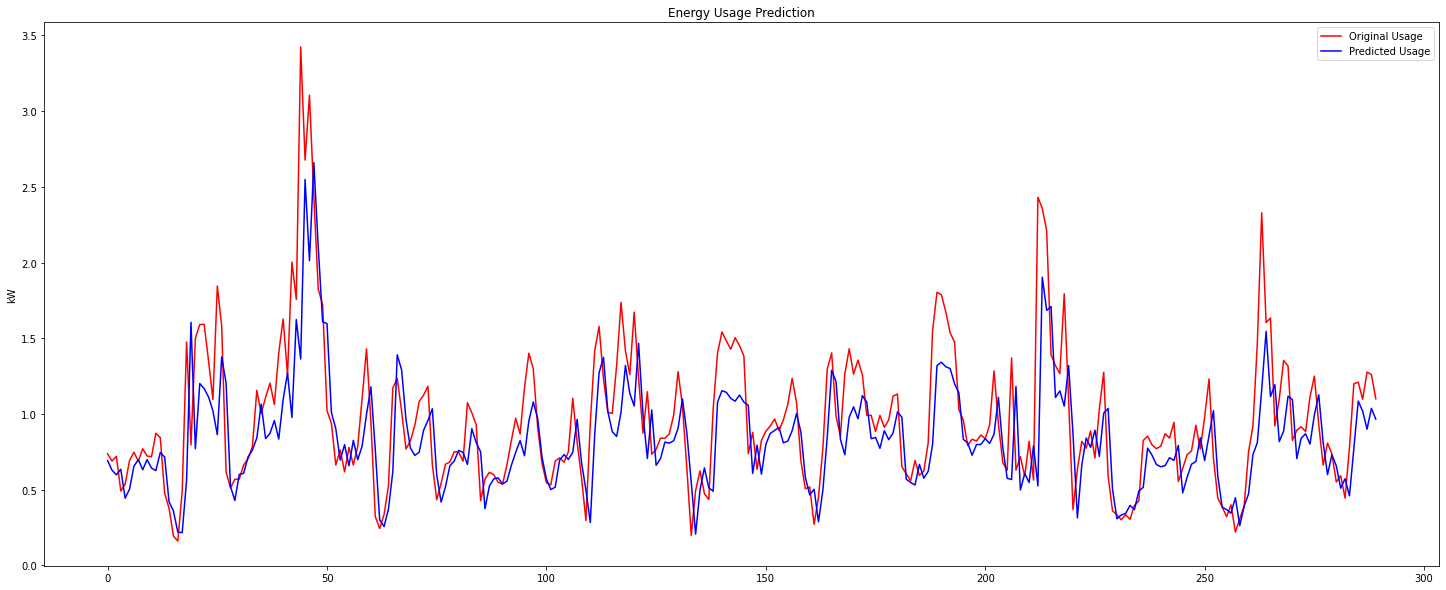

MAPE:  0.245654212864957
MAE:  0.23361492132404915
MSE:  0.11566918921222143
R2:  0.47125615719734215


In [94]:
lstm_prediction = model.predict(test_generator)


lstm_prediction = st_y.inverse_transform(lstm_prediction)
y_test = st_y.inverse_transform(use_test_scalled)[10:]

plt.figure(figsize=(25,10))
plt.plot(y_test, color='red', label='Original Usage')
plt.plot(lstm_prediction[:,0] , color='blue', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.ylabel('kW')
plt.legend()
plt.show()

print("MAPE: ", mean_absolute_percentage_error(y_test, lstm_prediction))
print("MAE: ", mean_absolute_error(y_test, lstm_prediction))
print("MSE: ", mean_squared_error(y_test, lstm_prediction))
print("R2: ", r2_score(y_test, lstm_prediction))

In [95]:
def to_sequences(dataset, seq_size=1):
    x = []
    y = []

    for i in range(len(dataset)-seq_size-1):
        #print(i)
        window = dataset[i:(i+seq_size), 0]
        x.append(window)
        y.append(dataset[i+seq_size, 0])
        
    return np.array(x),np.array(y)

seq_size = 10

x_train, y_train = to_sequences(use_train_scalled, seq_size)
x_test, y_test = to_sequences(use_test_scalled, seq_size)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8082, 10)
(8082,)
(289, 10)
(289,)


In [96]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(None, seq_size)))
model.add(LSTM(units=30))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, None, 30)          4920      
                                                                 
 lstm_19 (LSTM)              (None, 30)                7320      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 12,271
Trainable params: 12,271
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(x_train, y_train, epochs = 32, batch_size = 64)


Epoch 1/32
127/127 [==============================] - 2s 2ms/step - loss: 0.0067
Epoch 2/32
127/127 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 3/32
127/127 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 4/32
127/127 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 5/32
127/127 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 6/32
127/127 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 7/32
127/127 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 8/32
127/127 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 9/32
127/127 [==============================] - 0s 3ms/step - loss: 0.0029
Epoch 10/32
127/127 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 11/32
127/127 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 12/32
127/127 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 13/32
127/127 [====

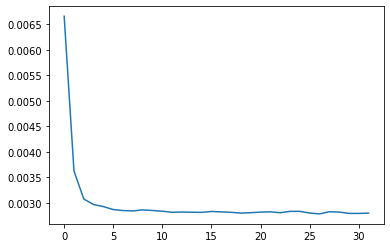

In [99]:
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

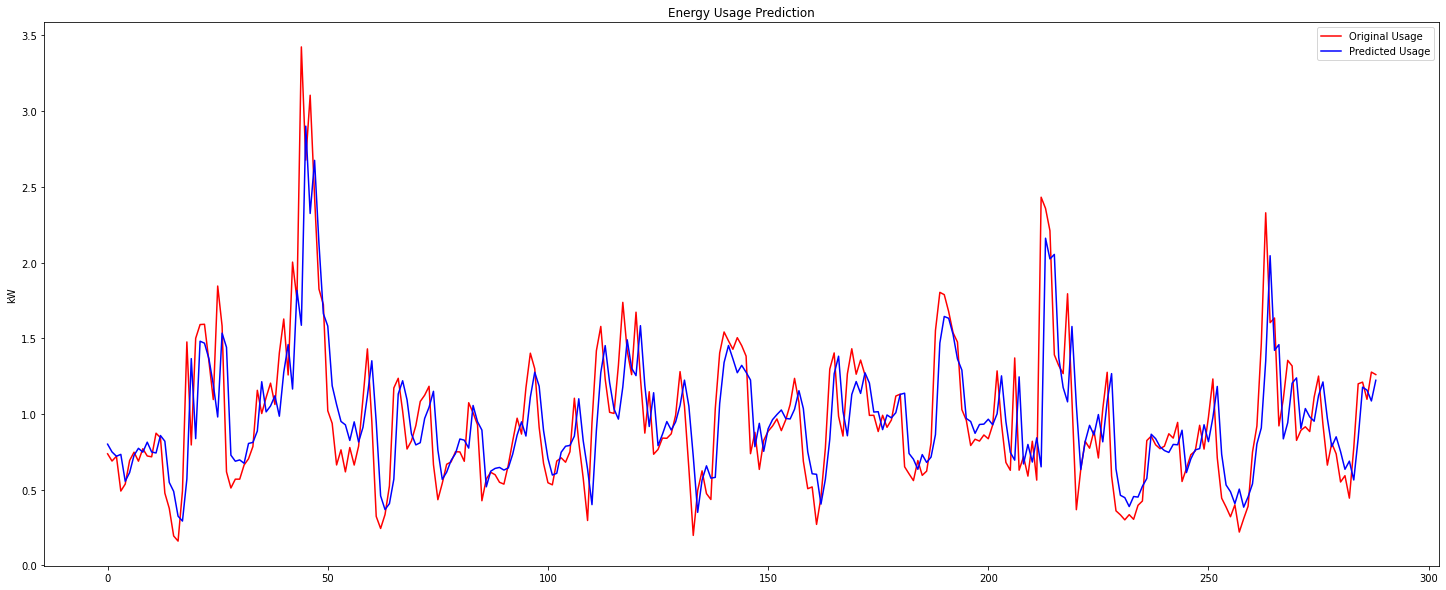

In [100]:
lstm_prediction = model.predict(x_test)

lstm_prediction = st_y.inverse_transform(lstm_prediction)
y_test = st_y.inverse_transform(y_test)

plt.figure(figsize=(25,10))
plt.plot(y_test, color='red', label='Original Usage')
plt.plot(lstm_prediction[:,0] , color='blue', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.ylabel('kW')
plt.legend()
plt.show()

In [101]:
print("MAPE: ", mean_absolute_percentage_error(y_test, lstm_prediction))
print("MAE: ", mean_absolute_error(y_test, lstm_prediction))
print("MSE: ", mean_squared_error(y_test, lstm_prediction))
print("R2: ", r2_score(y_test, lstm_prediction))

MAPE:  0.26388972992258614
MAE:  0.21342943490669342
MSE:  0.0989548155841966
R2:  0.5490805960255098


## LSTM Multi Variate

In [24]:
scaler = StandardScaler()

features_train_scalled = scaler.fit_transform(features_train)
features_test_scalled = scaler.transform(features_test)

In [25]:
trainX = []
trainY = []

n_future = 1
n_past = 24

for i in range(n_past, len(features_train_scalled) - n_future +1):
    trainX.append(features_train_scalled[i - n_past:i, 0:features_train_scalled.shape[1]])
    trainY.append(features_train_scalled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (8074, 24, 26).
trainY shape == (8074, 1).


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(LSTM(units=64))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 64)            23296     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 56,385
Trainable params: 56,385
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(trainX, trainY, epochs = 64, batch_size = 64)


Epoch 1/64
127/127 [==============================] - 4s 18ms/step - loss: 0.6267
Epoch 2/64
127/127 [==============================] - 2s 18ms/step - loss: 0.4355
Epoch 3/64
127/127 [==============================] - 2s 18ms/step - loss: 0.3556
Epoch 4/64
127/127 [==============================] - 2s 18ms/step - loss: 0.3201
Epoch 5/64
127/127 [==============================] - 2s 19ms/step - loss: 0.2932
Epoch 6/64
127/127 [==============================] - 2s 18ms/step - loss: 0.2744
Epoch 7/64
127/127 [==============================] - 2s 18ms/step - loss: 0.2682
Epoch 8/64
127/127 [==============================] - 2s 18ms/step - loss: 0.2486
Epoch 9/64
127/127 [==============================] - 2s 18ms/step - loss: 0.2359
Epoch 10/64
127/127 [==============================] - 2s 18ms/step - loss: 0.2296
Epoch 11/64
127/127 [==============================] - 2s 18ms/step - loss: 0.2071
Epoch 12/64
127/127 [==============================] - 2s 18ms/step - loss: 0.1939
Epoch 13/64
1

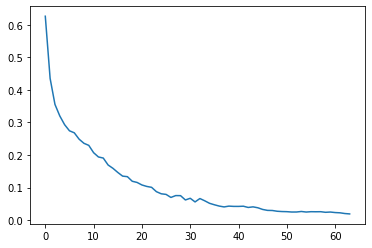

In [28]:
loss_per_epoch = history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [29]:
testX = []
testY = []

n_future = 1
n_past = 24

for i in range(n_past, len(features_test_scalled) - n_future +1):
    testX.append(features_test_scalled[i - n_past:i, 0:features_test_scalled.shape[1]])
    testY.append(features_test_scalled[i + n_future - 1:i + n_future, 0])

testX, testY = np.array(testX), np.array(testY)

print('trainX shape == {}.'.format(testX.shape))
print('trainY shape == {}.'.format(testY.shape))

trainX shape == (276, 24, 26).
trainY shape == (276, 1).


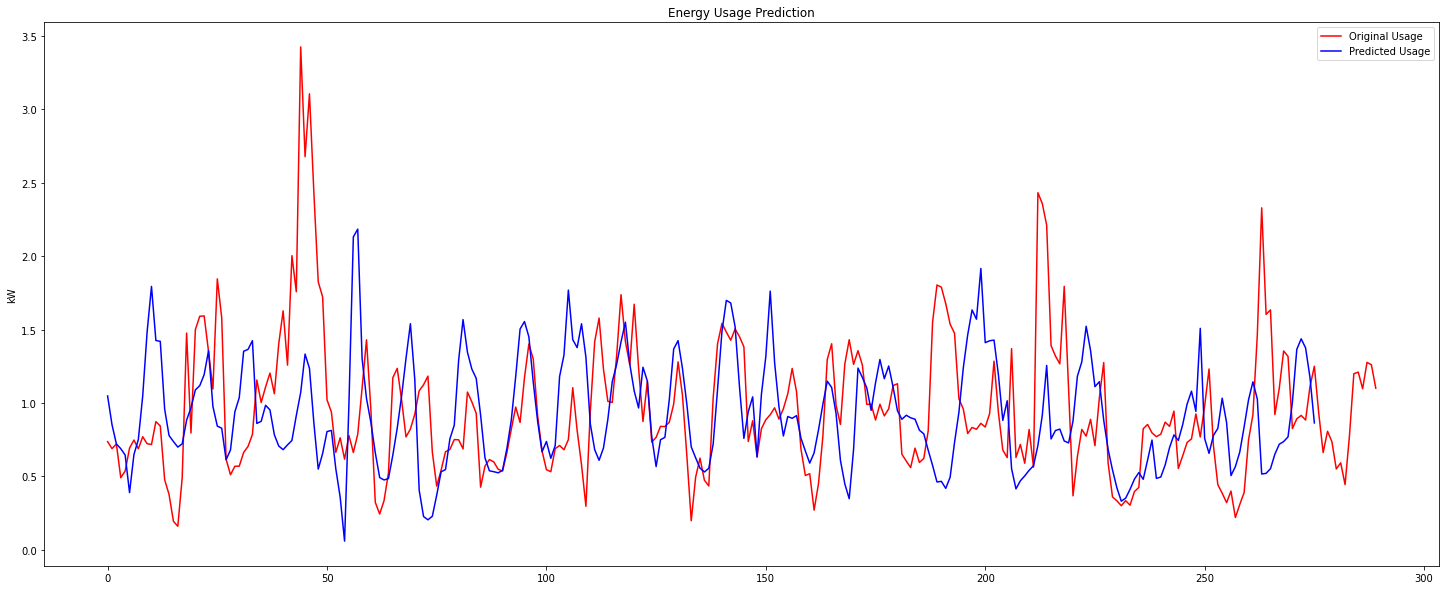

In [30]:
lstm_prediction = model.predict(testX)

lstm_prediction =np.repeat(lstm_prediction, features_test_scalled.shape[1], axis=-1)
lstm_prediction = scaler.inverse_transform(lstm_prediction)[:,0].reshape(-1, 1)
testY = use_test[10:]

plt.figure(figsize=(25,10))
plt.plot(testY, color='red', label='Original Usage')
plt.plot(lstm_prediction[:,0] , color='blue', label='Predicted Usage')
plt.title('Energy Usage Prediction')
plt.ylabel('kW')
plt.legend()
plt.show()

In [32]:
print("MAPE: ", mean_absolute_percentage_error(testY, lstm_prediction))
print("MAE: ", mean_absolute_error(testY, lstm_prediction))
print("MSE: ", mean_squared_error(testY, lstm_prediction))
print("R2: ", r2_score(testY, lstm_prediction))

ValueError: Found input variables with inconsistent numbers of samples: [290, 276]